In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [4]:
df = pd.read_csv('data/games0108.csv', sep=',')

In [5]:
df = df.drop('fortlfd', axis=1)

In [6]:
df.head()

,contest,year,month,day,time,break,hoamTeam,guestTeam,resultNumeric,homeTotalGoalDiff,guestTotalGoalDiff,homeTeamGoalsDiffAtHome,homeTeamGoalsDiffAway,guestTeamGoalsDiffAtHome,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
0,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Di,20:30,45,Hibernians FC,Red Bull Salzburg,-3.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,ÖFB-Cup ÖFB-Cup,2017,7,Sa,17:00,4,Deutschlandsberger SC,Red Bull Salzburg,-7.0,0.00,3.000000,0.0,0.0,0.0,3.0,0.0,3.0
2,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Mi,20:30,4,Red Bull Salzburg,Hibernians FC,3.0,5.00,-3.000000,0.0,5.0,-3.0,0.0,3.0,0.0
3,Bundesliga Bundesliga,2017,7,Sa,18:30,3,Wolfsberger AC,Red Bull Salzburg,-2.0,0.00,4.333333,0.0,0.0,3.0,5.0,0.0,3.0
4,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Mi,18:45,4,Red Bull Salzburg,HNK Rijeka,0.0,3.75,0.000000,3.0,4.0,0.0,0.0,3.0,0.0


In [7]:
df['result'] = np.where(df.resultNumeric < 0, 'lost', np.where(df.resultNumeric > 0, 'won', 'draw'))

In [8]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [9]:
y_cat = (pd.get_dummies(df.result))
y_reg = df.resultNumeric

In [10]:
df.shape

(522, 18)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 18 columns):
contest                     522 non-null object
year                        522 non-null int64
month                       522 non-null int64
day                         522 non-null object
time                        522 non-null object
break                       522 non-null int64
hoamTeam                    522 non-null object
guestTeam                   522 non-null object
resultNumeric               522 non-null float64
homeTotalGoalDiff           522 non-null float64
guestTotalGoalDiff          522 non-null float64
homeTeamGoalsDiffAtHome     522 non-null float64
homeTeamGoalsDiffAway       522 non-null float64
guestTeamGoalsDiffAtHome    522 non-null float64
guestTeamGoalsDiffAway      522 non-null float64
hoamAvgPoints               522 non-null float64
guestAvgpoints              522 non-null float64
result                      522 non-null object
dtypes: float64(9), int64

In [14]:
df.corr()['resultNumeric'].sort_values()

guestTotalGoalDiff         -0.215955
guestTeamGoalsDiffAway     -0.211635
guestTeamGoalsDiffAtHome   -0.172638
guestAvgpoints             -0.157949
break                      -0.082948
month                      -0.009726
year                        0.058273
homeTeamGoalsDiffAtHome     0.242608
homeTeamGoalsDiffAway       0.270778
homeTotalGoalDiff           0.313707
hoamAvgPoints               0.357243
resultNumeric               1.000000
Name: resultNumeric, dtype: float64

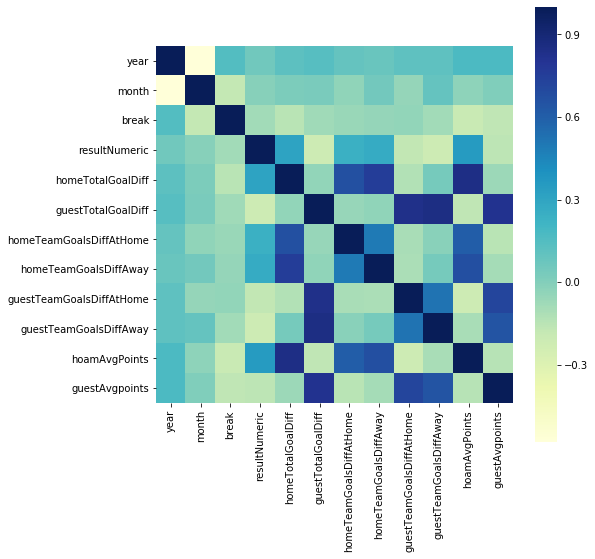

In [15]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), square=True, cmap="YlGnBu")
plt.show()

In [16]:
X = df.drop(['resultNumeric', 'result', 'contest', 'hoamTeam', 'guestTeam', 'day', 'time'], axis=1)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
    X, y_reg, y_cat, test_size=0.2, random_state=123)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input, BatchNormalization
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_monitor = EarlyStopping(patience=3)

In [22]:
in_cols=X_train.shape[1]
out_cols=y_cat.shape[1]

in_cols, out_cols

(11, 3)

In [23]:
model_1 = Sequential()

model_1.add(Dense(12, input_shape=(in_cols,), activation='relu', ))
model_1.add(Dense(12, activation='relu'))
model_1.add(Dense(1))


Instructions for updating:
Colocations handled automatically by placer.


In [24]:
model_1.compile(optimizer='adam', loss='mse')

In [25]:
model_1_training = model_1.fit(
    X_train_scaled,
    y_reg_train,
    validation_data=[X_test_scaled,y_reg_test],
    epochs=100
)

Instructions for updating:
Use tf.cast instead.
Train on 417 samples, validate on 105 samples
Epoch 1/100
417/417 [==============================] - 1s 2ms/step - loss: 4.9800 - val_loss: 4.8871
Epoch 2/100
417/417 [==============================] - 0s 115us/step - loss: 4.7489 - val_loss: 4.6924
Epoch 3/100
417/417 [==============================] - 0s 96us/step - loss: 4.5749 - val_loss: 4.5504
Epoch 4/100
417/417 [==============================] - 0s 86us/step - loss: 4.4582 - val_loss: 4.4257
Epoch 5/100
417/417 [==============================] - 0s 115us/step - loss: 4.3561 - val_loss: 4.3055
Epoch 6/100
417/417 [==============================] - 0s 86us/step - loss: 4.2694 - val_loss: 4.2090
Epoch 7/100
417/417 [==============================] - 0s 67us/step - loss: 4.1829 - val_loss: 4.1278
Epoch 8/100
417/417 [==============================] - 0s 86us/step - loss: 4.1041 - val_loss: 4.0642
Epoch 9/100
417/417 [==============================] - 0s 115us/step - loss: 4.0513 - val

417/417 [==============================] - 0s 96us/step - loss: 3.3661 - val_loss: 3.5449
Epoch 77/100
417/417 [==============================] - 0s 77us/step - loss: 3.3402 - val_loss: 3.5448
Epoch 78/100
417/417 [==============================] - 0s 86us/step - loss: 3.3425 - val_loss: 3.5515
Epoch 79/100
417/417 [==============================] - 0s 115us/step - loss: 3.3370 - val_loss: 3.5439
Epoch 80/100
417/417 [==============================] - 0s 86us/step - loss: 3.3416 - val_loss: 3.5273
Epoch 81/100
417/417 [==============================] - 0s 86us/step - loss: 3.3418 - val_loss: 3.5230
Epoch 82/100
417/417 [==============================] - 0s 96us/step - loss: 3.3488 - val_loss: 3.5618
Epoch 83/100
417/417 [==============================] - 0s 96us/step - loss: 3.3492 - val_loss: 3.5515
Epoch 84/100
417/417 [==============================] - 0s 106us/step - loss: 3.3316 - val_loss: 3.5380
Epoch 85/100
417/417 [==============================] - 0s 86us/step - loss: 3.3186 

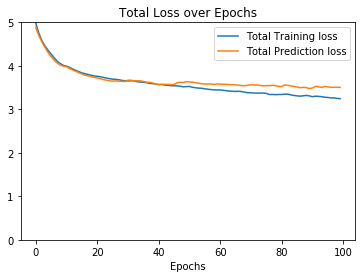

In [26]:
plt.plot(model_1_training.history['loss'])
plt.xlabel('Epochs')
plt.ylim([0, 5])
plt.title('Total Loss over Epochs')
plt.plot(model_1_training.history['val_loss'])
plt.legend(['Total Training loss', 'Total Prediction loss'])

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [28]:
rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_reg_train)
rfr.score(X_train, y_reg_train)

0.8610017761531782

In [29]:
rfr.score(X_test, y_reg_test)
pred_y = rfr.predict(X_test)

In [30]:
np.sqrt(mean_squared_error(np.exp(y_reg_test), np.exp(pred_y)))

13.119264586747995

In [31]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(8, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(16, activation='relu', name='hidden_2')(batch_1)
batch_2 = BatchNormalization()(hidden_2)
hidden_3 = Dense(16, activation='relu', name='hidden_3')(batch_2)
output_tensor_reg = Dense(1, name='Regression')(hidden_3)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [32]:
model_2 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [33]:
model_2.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [34]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 11)                0         
_________________________________________________________________
hidden_1 (Dense)             (None, 8)                 96        
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
hidden_2 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
hidden_3 (Dense)             (None, 16)                272       
_________________________________________________________________
Regression (Dense)           (None, 1)                 17        
__________

In [35]:
model_2_training = model_2.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    callbacks=[early_stopping_monitor],
    verbose=True)

Train on 417 samples, validate on 105 samples
Epoch 1/50
417/417 [==============================] - 5s 12ms/step - loss: 5.6800 - Regression_loss: 4.5867 - Classification_loss: 1.0933 - Regression_acc: 0.2158 - Classification_acc: 0.3933 - val_loss: 41419.0357 - val_Regression_loss: 41413.0230 - val_Classification_loss: 6.0127 - val_Regression_acc: 0.0000e+00 - val_Classification_acc: 0.3143
Epoch 2/50
417/417 [==============================] - 2s 5ms/step - loss: 5.6641 - Regression_loss: 4.5800 - Classification_loss: 1.0841 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 41300.3926 - val_Regression_loss: 41294.2741 - val_Classification_loss: 6.1186 - val_Regression_acc: 0.0000e+00 - val_Classification_acc: 0.3048
Epoch 3/50
417/417 [==============================] - 2s 6ms/step - loss: 5.6522 - Regression_loss: 4.5755 - Classification_loss: 1.0767 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 41654.0478 - val_Regression_loss: 41647.9972 - val_Cla

In [36]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(in_cols, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(in_cols, activation='relu', name='hidden_2')(batch_1)
output_tensor_reg = Dense(1, name='Regression')(hidden_2)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [37]:
model_3 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [38]:
model_3.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [39]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 11)                0         
_________________________________________________________________
hidden_1 (Dense)             (None, 11)                132       
_________________________________________________________________
batch_normalization_3 (Batch (None, 11)                44        
_________________________________________________________________
hidden_2 (Dense)             (None, 11)                132       
_________________________________________________________________
Regression (Dense)           (None, 1)                 12        
_________________________________________________________________
Classification (Dense)       (None, 3)                 6         
Total params: 326
Trainable params: 304
Non-trainable params: 22
_________________________________________________________________


In [40]:
model_3_training = model_3.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=100,
    #callbacks=[early_stopping_monitor],
    verbose=True)

Train on 417 samples, validate on 105 samples
Epoch 1/100
417/417 [==============================] - 3s 8ms/step - loss: 5.6818 - Regression_loss: 4.5877 - Classification_loss: 1.0941 - Regression_acc: 0.2158 - Classification_acc: 0.3717 - val_loss: 482.2347 - val_Regression_loss: 476.8687 - val_Classification_loss: 5.3659 - val_Regression_acc: 0.0476 - val_Classification_acc: 0.3810
Epoch 2/100
417/417 [==============================] - 2s 4ms/step - loss: 5.6664 - Regression_loss: 4.5812 - Classification_loss: 1.0853 - Regression_acc: 0.2158 - Classification_acc: 0.3645 - val_loss: 488.2465 - val_Regression_loss: 483.0270 - val_Classification_loss: 5.2195 - val_Regression_acc: 0.0381 - val_Classification_acc: 0.3905
Epoch 3/100
417/417 [==============================] - 2s 5ms/step - loss: 5.6553 - Regression_loss: 4.5763 - Classification_loss: 1.0790 - Regression_acc: 0.2158 - Classification_acc: 0.3429 - val_loss: 427.8808 - val_Regression_loss: 422.9384 - val_Classification_loss: 

Epoch 25/100
417/417 [==============================] - 1s 3ms/step - loss: 5.6330 - Regression_loss: 4.5695 - Classification_loss: 1.0635 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 517.6273 - val_Regression_loss: 514.0498 - val_Classification_loss: 3.5776 - val_Regression_acc: 0.0476 - val_Classification_acc: 0.3810
Epoch 26/100
417/417 [==============================] - 1s 3ms/step - loss: 5.6329 - Regression_loss: 4.5694 - Classification_loss: 1.0635 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 506.8267 - val_Regression_loss: 503.3082 - val_Classification_loss: 3.5185 - val_Regression_acc: 0.0476 - val_Classification_acc: 0.3810
Epoch 27/100
417/417 [==============================] - 1s 3ms/step - loss: 5.6335 - Regression_loss: 4.5699 - Classification_loss: 1.0636 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 482.8762 - val_Regression_loss: 479.3902 - val_Classification_loss: 3.4859 - val_Regression_acc: 0.0381 - val_C

Epoch 49/100
417/417 [==============================] - 1s 2ms/step - loss: 5.6333 - Regression_loss: 4.5699 - Classification_loss: 1.0634 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 511.1484 - val_Regression_loss: 507.5628 - val_Classification_loss: 3.5856 - val_Regression_acc: 0.0571 - val_Classification_acc: 0.3810
Epoch 50/100
417/417 [==============================] - 1s 3ms/step - loss: 5.6331 - Regression_loss: 4.5696 - Classification_loss: 1.0635 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 544.4534 - val_Regression_loss: 540.7885 - val_Classification_loss: 3.6649 - val_Regression_acc: 0.0286 - val_Classification_acc: 0.3619
Epoch 51/100
417/417 [==============================] - 1s 3ms/step - loss: 5.6343 - Regression_loss: 4.5707 - Classification_loss: 1.0636 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 547.4711 - val_Regression_loss: 543.7877 - val_Classification_loss: 3.6835 - val_Regression_acc: 0.0286 - val_C

Epoch 73/100
417/417 [==============================] - 2s 5ms/step - loss: 5.6337 - Regression_loss: 4.5704 - Classification_loss: 1.0632 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 461.8184 - val_Regression_loss: 458.1636 - val_Classification_loss: 3.6548 - val_Regression_acc: 0.0667 - val_Classification_acc: 0.3714
Epoch 74/100
417/417 [==============================] - 2s 5ms/step - loss: 5.6330 - Regression_loss: 4.5696 - Classification_loss: 1.0634 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 501.8462 - val_Regression_loss: 498.1460 - val_Classification_loss: 3.7002 - val_Regression_acc: 0.0286 - val_Classification_acc: 0.3619
Epoch 75/100
417/417 [==============================] - 2s 5ms/step - loss: 5.6325 - Regression_loss: 4.5691 - Classification_loss: 1.0634 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 434.8147 - val_Regression_loss: 431.1772 - val_Classification_loss: 3.6375 - val_Regression_acc: 0.0095 - val_C

Epoch 97/100
417/417 [==============================] - 2s 4ms/step - loss: 5.6332 - Regression_loss: 4.5698 - Classification_loss: 1.0634 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 510.1940 - val_Regression_loss: 506.3302 - val_Classification_loss: 3.8638 - val_Regression_acc: 0.0286 - val_Classification_acc: 0.3714
Epoch 98/100
417/417 [==============================] - 2s 4ms/step - loss: 5.6331 - Regression_loss: 4.5697 - Classification_loss: 1.0634 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 496.0252 - val_Regression_loss: 492.2468 - val_Classification_loss: 3.7784 - val_Regression_acc: 0.0762 - val_Classification_acc: 0.3619
Epoch 99/100
417/417 [==============================] - 2s 4ms/step - loss: 5.6331 - Regression_loss: 4.5695 - Classification_loss: 1.0636 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 543.4373 - val_Regression_loss: 539.5496 - val_Classification_loss: 3.8877 - val_Regression_acc: 0.0286 - val_C

In [41]:
model_3.predict(X_test_scaled)[0][6][0], model_3.predict(X_test_scaled)[1][6]

(9.222855, array([1.8566847e-05, 9.9998736e-01, 1.3100404e-01], dtype=float32))

In [42]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(in_cols*2, activation='relu', name='hidden_1')(input_tensor)
output_tensor_reg = Dense(1, name='Regression')(hidden_1)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [43]:
model_4 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [44]:
model_4.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [45]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 11)                0         
_________________________________________________________________
hidden_1 (Dense)             (None, 22)                264       
_________________________________________________________________
Regression (Dense)           (None, 1)                 23        
_________________________________________________________________
Classification (Dense)       (None, 3)                 6         
Total params: 293
Trainable params: 293
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_4_training = model_4.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    #callbacks=[early_stopping_monitor],
    verbose=True)

Train on 417 samples, validate on 105 samples
Epoch 1/50
417/417 [==============================] - 3s 6ms/step - loss: 5.2463 - Regression_loss: 4.0982 - Classification_loss: 1.1481 - Regression_acc: 0.2350 - Classification_acc: 0.2950 - val_loss: 5.0028 - val_Regression_loss: 3.8417 - val_Classification_loss: 1.1611 - val_Regression_acc: 0.1524 - val_Classification_acc: 0.2952
Epoch 2/50
417/417 [==============================] - 1s 4ms/step - loss: 4.9307 - Regression_loss: 3.7799 - Classification_loss: 1.1508 - Regression_acc: 0.2350 - Classification_acc: 0.2614 - val_loss: 4.8420 - val_Regression_loss: 3.7085 - val_Classification_loss: 1.1336 - val_Regression_acc: 0.1619 - val_Classification_acc: 0.2762
Epoch 3/50
417/417 [==============================] - 2s 4ms/step - loss: 4.8231 - Regression_loss: 3.7050 - Classification_loss: 1.1180 - Regression_acc: 0.2350 - Classification_acc: 0.2758 - val_loss: 4.7913 - val_Regression_loss: 3.6903 - val_Classification_loss: 1.1010 - val_Re

Epoch 25/50
417/417 [==============================] - 1s 3ms/step - loss: 4.2036 - Regression_loss: 3.2645 - Classification_loss: 0.9391 - Regression_acc: 0.2398 - Classification_acc: 0.5612 - val_loss: 4.6391 - val_Regression_loss: 3.6732 - val_Classification_loss: 0.9659 - val_Regression_acc: 0.1905 - val_Classification_acc: 0.5143
Epoch 26/50
417/417 [==============================] - 1s 3ms/step - loss: 4.1975 - Regression_loss: 3.2589 - Classification_loss: 0.9386 - Regression_acc: 0.2470 - Classification_acc: 0.5683 - val_loss: 4.6385 - val_Regression_loss: 3.6775 - val_Classification_loss: 0.9611 - val_Regression_acc: 0.1810 - val_Classification_acc: 0.5048
Epoch 27/50
417/417 [==============================] - 1s 3ms/step - loss: 4.1823 - Regression_loss: 3.2501 - Classification_loss: 0.9322 - Regression_acc: 0.2446 - Classification_acc: 0.5612 - val_loss: 4.7545 - val_Regression_loss: 3.7787 - val_Classification_loss: 0.9759 - val_Regression_acc: 0.1714 - val_Classification_a

417/417 [==============================] - 1s 2ms/step - loss: 3.9746 - Regression_loss: 3.0585 - Classification_loss: 0.9161 - Regression_acc: 0.2470 - Classification_acc: 0.5731 - val_loss: 4.7299 - val_Regression_loss: 3.7496 - val_Classification_loss: 0.9803 - val_Regression_acc: 0.1905 - val_Classification_acc: 0.5429
Epoch 50/50
417/417 [==============================] - 1s 2ms/step - loss: 3.9535 - Regression_loss: 3.0440 - Classification_loss: 0.9096 - Regression_acc: 0.2542 - Classification_acc: 0.5731 - val_loss: 4.6478 - val_Regression_loss: 3.6783 - val_Classification_loss: 0.9695 - val_Regression_acc: 0.1714 - val_Classification_acc: 0.5143


In [47]:
model_3.predict(X_test_scaled)[0][6][0], model_3.predict(X_test_scaled)[1][6]

(9.222855, array([1.8566847e-05, 9.9998736e-01, 1.3100404e-01], dtype=float32))

In [48]:
model_4.predict(X_test_scaled)[0][6][0], model_4.predict(X_test_scaled)[1][6]

(-0.052434582, array([0.27753693, 0.5459399 , 0.46128675], dtype=float32))

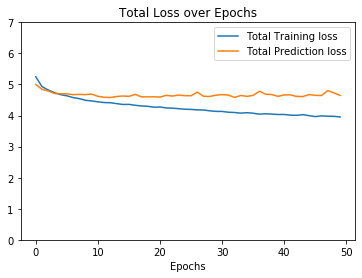

In [49]:
plt.plot(model_4_training.history['loss'])
plt.xlabel('Epochs')
plt.ylim([0, 7])
plt.title('Total Loss over Epochs')
plt.plot(model_4_training.history['val_loss'])
plt.legend(['Total Training loss', 'Total Prediction loss'])

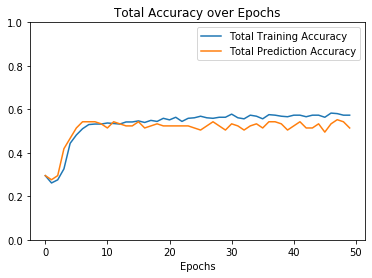

In [50]:
plt.plot(model_4_training.history['Classification_acc'])
plt.xlabel('Epochs')
plt.ylim([0, 1])
plt.title('Total Accuracy over Epochs')
plt.plot(model_4_training.history['val_Classification_acc'])
plt.legend(['Total Training Accuracy', 'Total Prediction Accuracy'])